## Plot Generation Code for Ablation Studies
#### Stores results from train runs across several iterations of model params

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from typing import Dict

sns.set()

In [2]:
def gen_plot(
        mins_per_step: Dict,
        val_loss: Dict,
        title: str,
        min_x: int = 0,
        max_x: int = 600,
        step_x: int = 50,
):
    """
    Generate a plot with given parameters for validation loss stored in dictionary by key, with time per step/epoch in val losses
    """
    compute_xticks = range(min_x, max_x+1, step_x)
    plt.figure(figsize=(8,6))
    for label in mins_per_step.keys():
        model_mins_vs_epoch = [batch * mins_per_step[label] for batch in list(range(1, len(val_loss[label])+1))]
        plt.plot(model_mins_vs_epoch, val_loss[label], label=label)
    plt.xticks(compute_xticks)
    plt.title(title)
    plt.xlim(min_x-0.01, max_x+0.01)
    plt.xlabel("Compute (GPU minutes on a T4)")
    plt.ylabel("Validation Loss")
    plt.legend()
    plt.show()

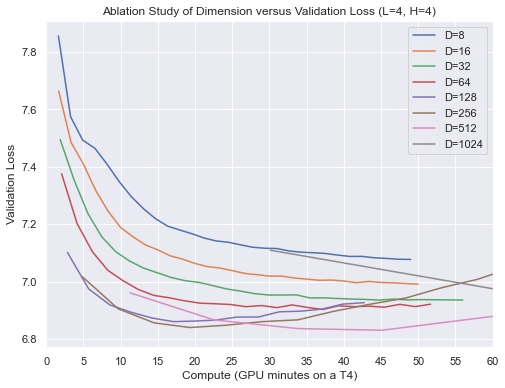

In [58]:
"""val_loss = {
    "D=1024":   [7.109707554516490, 6.974646889703799, 6.918668639725904, 6.878853670704779, 6.823155532244767, 6.86464073479892],# 6.862626418052453], #6.966870578751223, 6.97682294716578, 7.076533252880819, 7.095047861252916, 7.197130298011864, 7.104368573832097, 7.221817576904056, 7.226820093609899],
    "D=512":    [6.960881745457461, 6.866640273993614, 6.83662706453465, 6.83073976028587, 6.867408048861776, 6.903992241592769, 6.9558755971055835, 7.029895893958696, 7.107804814409494, 7.191096406035702, 7.286795201083119, 7.388899907869939, 7.478887890187485, 7.59946150275015, 7.700995767662687],
    "D=256":    [7.017460374847219, 6.905375044492748, 6.856485381887234, 6.840226763232624, 6.848249520547394, 6.8606219660802665, 6.867043647344267, 6.896825192287258, 6.921271713612392, 6.942998578763121, 6.978937448860156, 7.00822504775784, 7.050713270949715, 7.0651194676403755, 7.111186955589066],
    "D=128":    [7.101649097545075, 6.974879997036468, 6.918906639725864, 6.893536707047979, 6.873224473112567, 6.86079892464347, 6.862664185052423, 6.866223788751057, 6.87671822657894, 6.876833258081952, 6.895047861252916, 6.897130298011864, 6.904368573832097, 6.921817576904056, 6.926820093609899],
    "D=64":     [7.375701069455793, 7.2029736335345245, 7.104243671104359, 7.039830221362671, 7.003143727215306, 6.972263366266004, 6.952112103110232, 6.9438658347265205, 6.933351692717158, 6.925108163514724, 6.922991361527789, 6.920348717963281, 6.912754043795709, 6.916846139949955, 6.909608209170754, 6.918953182569438, 6.910063921089052, 6.903204827654625, 6.91585493539034, 6.912975460196895, 6.914609147923226, 6.911132039331863, 6.921017424165262, 6.913119212310021, 6.92151724728124],
    "D=32":     [7.495337908952394, 7.354595418984205, 7.237145660051412, 7.15615840213908, 7.104427098475796, 7.071901306368951, 7.047490309465571, 7.030922005229192, 7.014472332662589, 7.003473806832491, 6.997315695609204, 6.9862500034296175, 6.974474236040085, 6.9671318989822915, 6.958190191431377, 6.953547330308788, 6.953370805794508, 6.953931900228988, 6.943206803655775, 6.9435699775768, 6.941332206365062, 6.939501912811953, 6.938117009232097, 6.93579626083374, 6.939255875367848, 6.936476575087298, 6.937470463172119, 6.9369285610572025, 6.936544988433646, 6.936010004218068],
    "D=16":     [7.664198005989147, 7.485358038159199, 7.408954271382714, 7.3168497416499285, 7.244448527928783, 7.1885873195876835, 7.156129949852495, 7.128063964542906, 7.110463703468395, 7.089968121766292, 7.078612228297285, 7.063296871606484, 7.052450790766286, 7.047709571826345, 7.038432540953724, 7.028847351435231, 7.024268648225802, 7.019393493700479, 7.019511195763428, 7.012746137023348, 7.008884991005016, 7.004852055751186, 7.005664476460839, 7.002369494092201, 6.996297782151857, 7.000903686138358, 6.997258971542214, 6.9960699833529985, 6.993538197658792, 6.9912051522769385],
    "D=8":      [7.856194206987634, 7.574808770549787, 7.493019853104553, 7.464783349623816, 7.409644865463209, 7.348886679399653, 7.296252901997852, 7.254353052434109, 7.219147408422235, 7.193343496473053, 7.179867562435403, 7.166890365468214, 7.151974882613221, 7.1418351089164664, 7.137255546798466, 7.128164759193685, 7.119922120488405, 7.116573404438488, 7.115353841510857, 7.10700507870984, 7.1026249939710935, 7.10072481745049, 7.0981228404240655, 7.092587875642987, 7.087877866221527, 7.088097015765939, 7.083256408619204, 7.081047664305389, 7.078140789778074, 7.077534970424905]
}"""

mins_per_model = {
    "D=8":      1.633,
    "D=16":     1.667,
    "D=32":     1.867,
    "D=64":     2.067,
    "D=128":    2.85,
    "D=256":    4.833,
    "D=512":    11.283,
    "D=1024":   30.1
}

models = list(mins_per_model.keys())

val_loss = {}
train_loss = {}
for model in models:
    res = np.genfromtxt('../data/small-results/D=8.txt', delimiter=',', skip_header=1)
    val_loss[model] = res[]

gen_plot(
    mins_per_model,
    val_loss,
    "Ablation Study of Dimension versus Validation Loss (L=4, H=4)",
    0,
    60,
    5
)


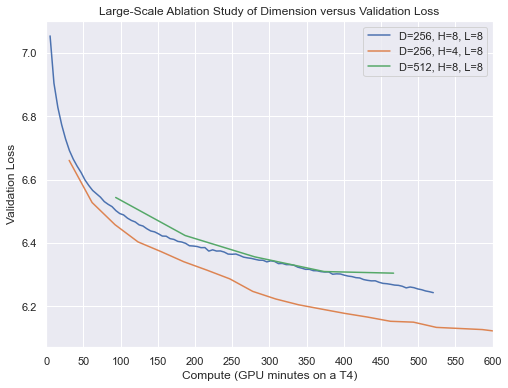

In [59]:
val_loss = {
    'D=256, H=8, L=8': [
        7.0540618061733475,
        6.904765713986733,
        6.8288397789001465,
        6.773383010205605,
        6.728791821203072,
        6.692099709019101,
        6.664839466698735,
        6.642713420968548,
        6.6230973842904435,
        6.599592745732918,
        6.5818216086005705,
        6.566203596494752,
        6.555637812442916,
        6.545141468802802,
        6.53108053298877,
        6.522391526247386,
        6.515181599189337,
        6.502509574524218,
        6.4932234024258255,
        6.4888414135939785,
        6.478662174668529,
        6.471495210409736,
        6.466687746185193,
        6.45752447114574,
        6.453865492658363,
        6.445291659243101,
        6.438280103303832,
        6.435394613005275,
        6.429314680236707,
        6.422145371242679,
        6.421725744252011,
        6.414050190282954,
        6.411581758686679,
        6.405390706279581,
        6.40341036153926,
        6.399264544320049,
        6.391545384907894,
        6.390706441385283,
        6.389123930919657,
        6.385527196262094,
        6.385824519095661,
        6.374699228959118,
        6.378765401222723,
        6.374868149951779,
        6.375173528703282,
        6.371607384235739,
        6.365257888103275,
        6.364698076705567,
        6.365469510606725,
        6.360905724463703,
        6.355608482726758,
        6.353347459857127,
        6.3516428905139435,
        6.348638124031415,
        6.345981095906356,
        6.345786279339871,
        6.340662660644495,
        6.343975502238285,
        6.341919091679781,
        6.335185794235705,
        6.335748962932925,
        6.33202267950959,
        6.331912690787006,
        6.330003660645702,
        6.323950758940882,
        6.320832533230313,
        6.317089047077462,
        6.317189312667298,
        6.3129790492480895,
        6.3125655410958705,
        6.30980175118938,
        6.308615651919688,
        6.308943308228783,
        6.3016493434814524,
        6.302876358123706,
        6.302411158879598,
        6.2987364076024335,
        6.295832340094111,
        6.2941806750903595,
        6.2909085756297305,
        6.289868122096256,
        6.284864822451731,
        6.282402526846321,
        6.280709462771885,
        6.280950925904784,
        6.2762454630945514,
        6.2728252296539235,
        6.271710104793668,
        6.269749103404349,
        6.2674128506109295,
        6.266556710648022,
        6.263672936734536,
        6.258542793260204,
        6.261368110597276,
        6.259226661791905,
        6.255250734105099,
        6.2527865208596065,
        6.24892069281434,
        6.246532209199681,
        6.243496707875094
    ],
    'D=256, H=4, L=8': [
        6.661093155796916,
        6.527961091111643,
        6.457942371551221,
        6.403721909934339,
        6.3732055353280455,
        6.340963779546963,
        6.31464908145868,
        6.287016650739188,
        6.2474524357829235,
        6.223518060799986,
        6.205141068266603,
        6.19156516474276,
        6.17813344885366,
        6.166415143698549,
        6.1530800878811185,
        6.150364343350688,
        6.133823051239355,
        6.130421560031538,
        6.126979892627119,
        6.117933936012439
    ],
    'D=512, H=8, L=8': [
        6.544027958556617,
        6.423903428679176,
        6.356631277276458,
        6.310150839441972,
        6.3050467653526105
    ]
}

mins_per_batch = {
    'D=256, H=8, L=8': 312.17/60,
    'D=256, H=4, L=8': 1851.03/60,
    'D=512, H=8, L=8': 5602.62/60
}

gen_plot(
    mins_per_batch,
    val_loss,
    "Large-Scale Ablation Study of Dimension versus Validation Loss",
    0,
    600,
    50
)

